In [18]:
%matplotlib inline
from stack_nlp import *
from jupyter_mplsettings import *
matplotlib.rc('font', **font)

In [2]:
cfg = local_import("./default.py")

In [3]:
PrepareData(cfg)

Shape of question df (1696819, 21)
Shape of answer df (2028240, 21)
Loading word dictionary...
Warning! Dropping some words from word list, please verify!
Calculating normalized columns...


In [4]:
data = cfg.data

In [5]:
data.keys()

['meta', 'dict', 'features', 'answers']

In [6]:
qs = data["meta"];

In [7]:
qs.head()
print qs.shape

(673622, 46)


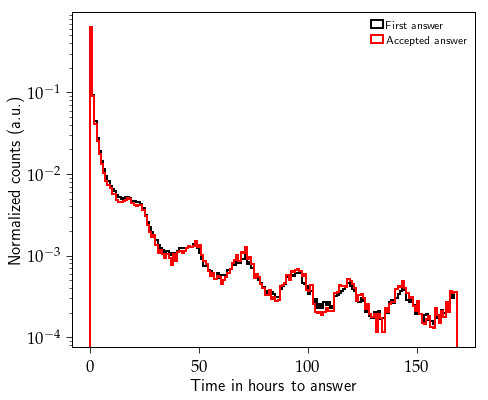

In [19]:
plt.figure(figsize=(8, 6))
plt.xlabel(r"Time in hours to answer")
plt.ylabel(r"Normalized counts (a.u.)")
plt.hist(qs.dt_answer_hour, range=[0, 7 * 24], bins=7 * 24, 
         histtype="step", lw=2, color="k", label="First answer", normed=True);
plt.hist(qs.dt_accanswer_hour, range=[0, 7 * 24], bins=7 * 24,
        histtype="step", lw=2, color="r", label="Accepted answer", normed=True);
plt.semilogy(nonposy="clip")
plt.legend(loc="upper right");

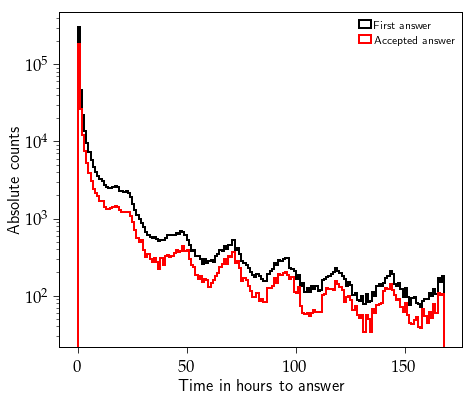

In [11]:
plt.figure(figsize=(8, 6))
plt.xlabel(r"Time in hours to answer")
plt.ylabel(r"Absolute counts")
plt.hist(qs.dt_answer_hour, range=[0, 7 * 24], bins=7 * 24, 
         histtype="step", lw=2, color="k", label="First answer");
plt.hist(qs.dt_accanswer_hour, range=[0, 7 * 24], bins=7 * 24,
        histtype="step", lw=2, color="r", label="Accepted answer");
plt.semilogy(nonposy="clip")
plt.legend(loc="upper right");

[]

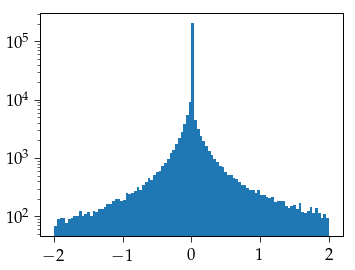

In [13]:
plt.hist(qs.dt_accanswer_hour - qs.dt_answer_hour, range=[-2, 2], bins=100);
plt.semilogy(nonposy="clip")

In [14]:
print np.sum(~qs.dt_answer.isnull())
print np.sum(~qs.dt_accanswer.isnull())

536044
307514


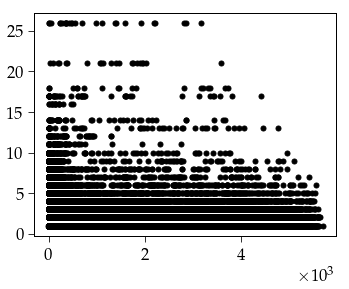

In [15]:
plt.plot(qs.dt_answer_hour, qs.AnswerCount, "k.")

In [26]:
qs.columns

Index([u'AcceptedAnswerId', u'AnswerCount', u'BodyNCodes', u'BodyNQMarks',
       u'BodySize', u'ClosedDate', u'CommentCount', u'CommunityOwnedDate',
       u'CreationDate', u'FavoriteCount', u'Id', u'LastActivityDate',
       u'LastEditDate', u'LastEditorUserId', u'OwnerUserId', u'ParentId',
       u'PostTypeId', u'Score', u'Tags', u'Title', u'ViewCount', u'titlelen',
       u'hasAnswers', u'dt_created', u'Id_r', u'hot_indices', u'nwords',
       u'ordersum', u'prob_bern', u'prob_poiss', u'ratio', u'ParentId_first',
       u'CreationDate_first', u'Id_acc', u'CreationDate_acc', u'dt_answer',
       u'dt_accanswer'],
      dtype='object')

[ 1.  4.]


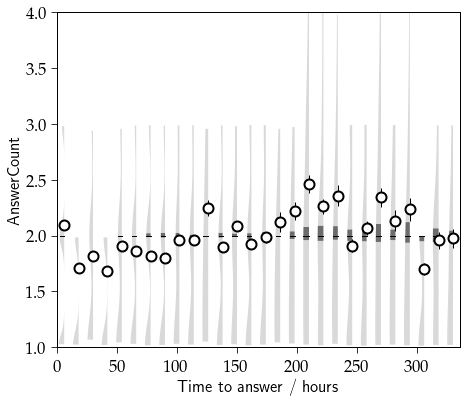

[ 0.  7.]


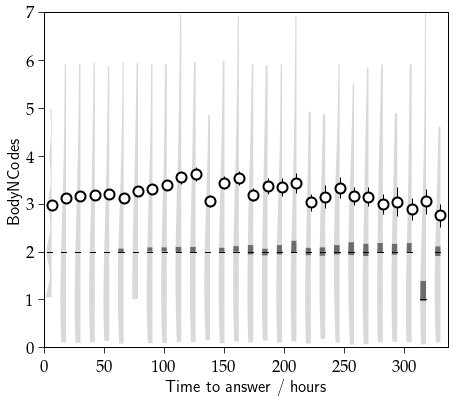

[ 0.  3.]


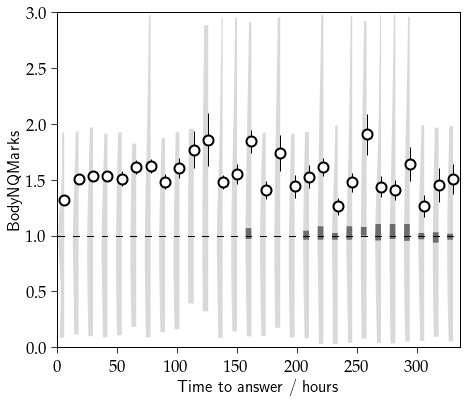

[  396.  3127.]


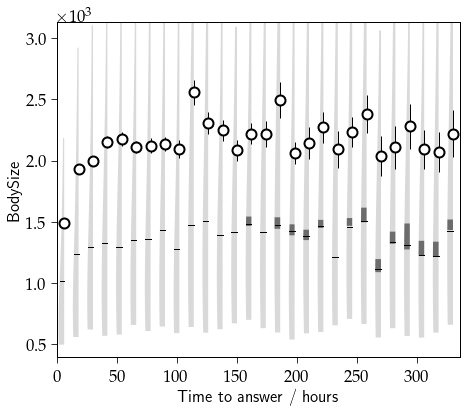

[ 31.  80.]


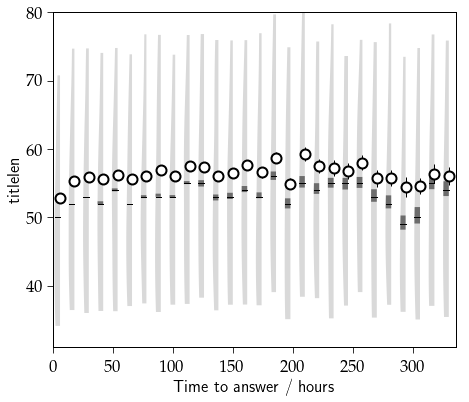

[ 14.  74.]


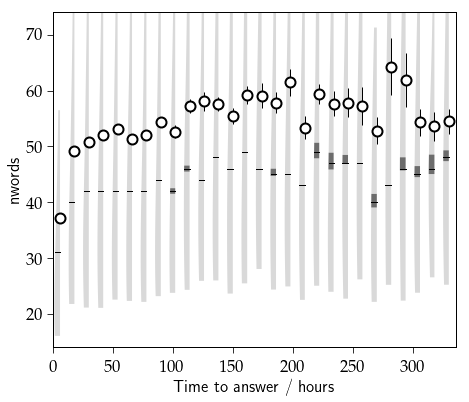

[  2974.  23345.]


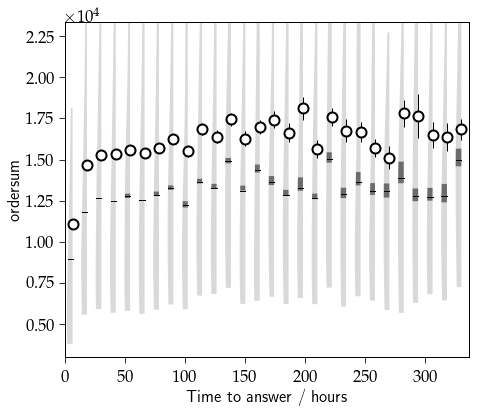

[ 0.26086957  0.88235294]


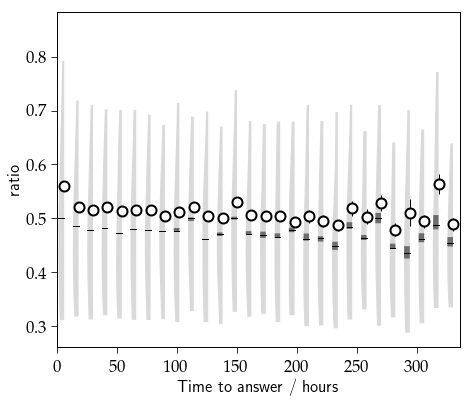

[ 0.  2.]


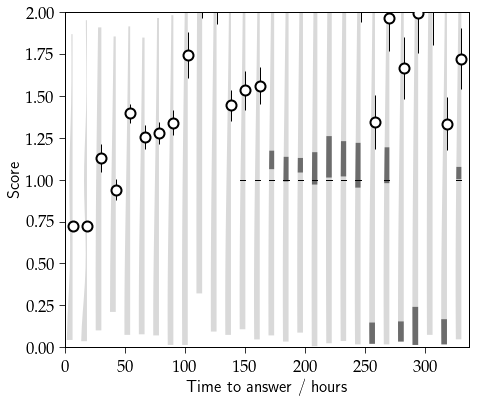

[  2.23909674e-54   3.09808260e-18]


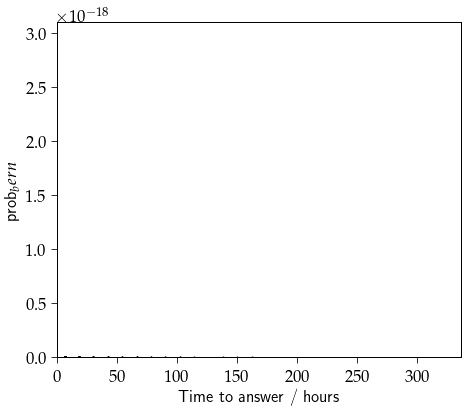

In [20]:
from scipy.stats.mstats import mquantiles

qs.columns
m = np.isfinite(qs.dt_accanswer_hour)

ndays = 14
# dthours = qs.dt_answer.dt.total_seconds() * 1. / 3600
cols = ["AnswerCount", "BodyNCodes", "BodyNQMarks", "BodySize", "titlelen", "nwords", "ordersum", "ratio", "Score", "prob_bern"]
# f, axarr = plt.subplots(2, 4, squeeze=False)
for i, col in enumerate(cols):
    quants = mquantiles(qs[m][col], prob=[0.1, 0.9])
    print quants
    plt.figure(i, figsize=(8, 6))
    plt.xlabel(r"Time to answer / hours")
    plt.ylabel(r"%s" % col)
#     plt.plot(dthours, qs[col], "k.")
    QuickSlicePlot(qs.dt_accanswer_hour[m], qs[m][col], qs.dt_accanswer_hour[m], zbins=1, yrange=quants, 
                   xRange=[0, ndays * 24], xbins=2 * ndays, draw="amvs",
                   axes=plt.gca())
    plt.xlim(0, ndays * 24)
    plt.show()
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
# plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
# plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

In [36]:
# training and testing samples
qs = shuffle(qs)
print len(qs)
# limiting to questions with accepted answer for training
qsgood = qs[~qs.dt_accanswer.isnull()]
print len(qsgood)
train = 250000
qstrain = qsgood.iloc[:train]
qstest = qsgood.iloc[train:]
print len(qstrain)
print len(qstest)

label = "dt_accanswer_hour"

# sample with no answers, aka the ultimate testing sample
qsnone = qs[qs.AnswerCount == 0]
print len(qsnone)

673622
307514
250000
57514
137566


In [33]:
qstrain.columns

Index([u'AcceptedAnswerId', u'AnswerCount', u'BodyNCodes', u'BodyNQMarks',
       u'BodySize', u'ClosedDate', u'CommentCount', u'CommunityOwnedDate',
       u'CreationDate', u'FavoriteCount', u'Id', u'LastActivityDate',
       u'LastEditDate', u'LastEditorUserId', u'OwnerUserId', u'ParentId',
       u'PostTypeId', u'Score', u'Tags', u'Title', u'ViewCount', u'titlelen',
       u'hasAnswers', u'dt_created', u'Id_r', u'hot_indices', u'nwords',
       u'ordersum', u'prob_bern', u'prob_poiss', u'ratio', u'ParentId_first',
       u'CreationDate_first', u'Id_acc', u'CreationDate_acc', u'dt_answer',
       u'dt_accanswer', u'dt_answer_hour', u'dt_accanswer_hour',
       u'BodyNCodes_norm', u'BodyNQMarks_norm', u'BodySize_norm',
       u'titlelen_norm', u'nwords_norm', u'ordersum_norm', u'ratio_norm'],
      dtype='object')

In [62]:
import dill
# dill.dump(estimator, open('estimator.dill', 'w'))
# estimator = dill.load(open('estimator.dill', 'r'))

## Fitting random forest to the space of simple features derived from the text

In [68]:
[col for col in qstrain.columns if "_norm" in col]

['BodyNCodes_norm',
 'BodyNQMarks_norm',
 'BodySize_norm',
 'titlelen_norm',
 'nwords_norm',
 'ordersum_norm',
 'ratio_norm']

In [75]:
pipe_feat_fct = lambda a: Pipeline([
         ("cst", ColumnSelectTransformer([col for col in qstrain.columns if "_norm" in col])),
         ("poly", PolynomialFeatures(degree=3)),
         ("ridge", Ridge(alpha=a, normalize=True))
#          ("ranforest", RandomForestRegressor(n_estimators=a))
    ])

pipe_feat = pipe_feat_fct(1)

In [76]:
pipe_feat.fit(qstrain, qstrain[label])
pred = pipe_feat.predict(qstest)
print np.column_stack((pred, qstest[label]))
print pipe_feat.score(qstest, qstest[label])

[[  51.46331865    0.884952  ]
 [  53.0227236     0.121296  ]
 [ 112.20745688    0.80592   ]
 ..., 
 [  54.41051173   23.326536  ]
 [  38.69573577    8.286192  ]
 [  56.94420598   95.72076   ]]
0.005475029044


In [65]:
dill.dump(pipe_feat, open("pipe_feat.dill", "w"))

In [ ]:
pipe_feat = dill.load(open('pipe_feat.dill', 'r'))

## Investigating difference (residuals) in test sample vs. various dimensions

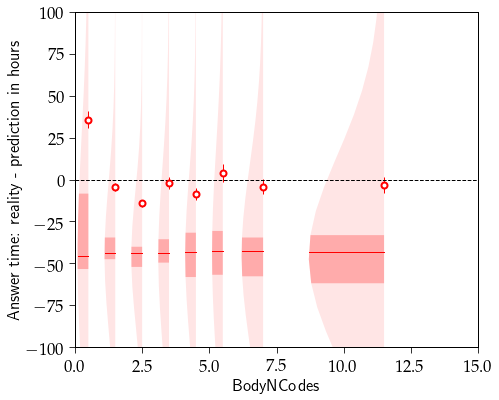

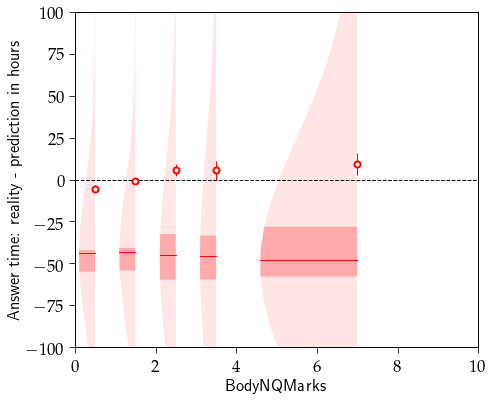

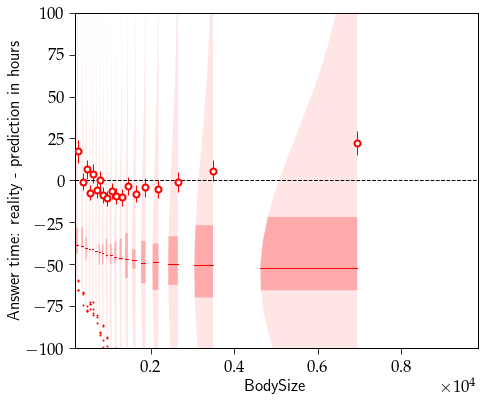

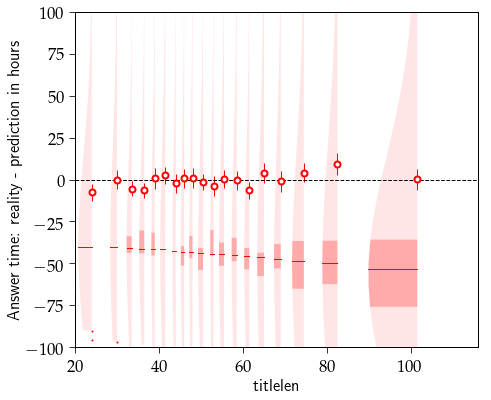

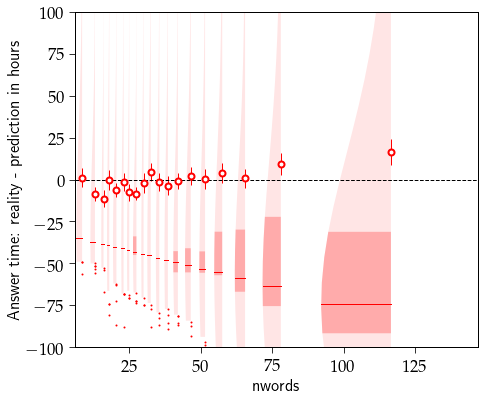

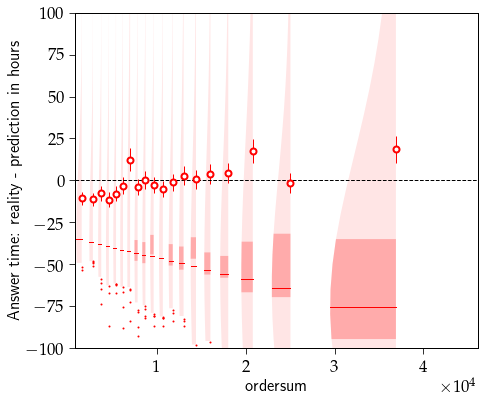

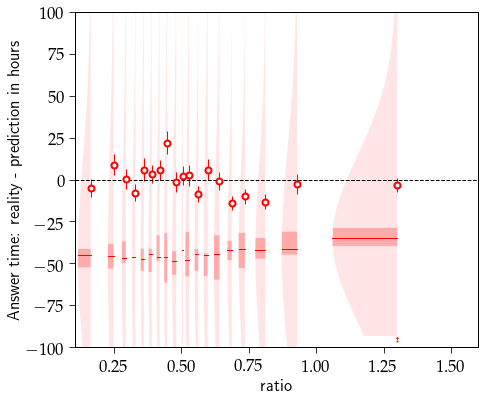

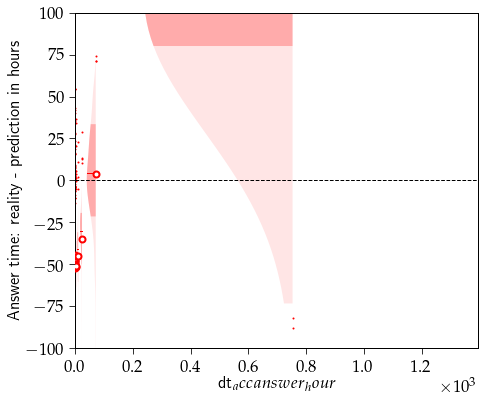

In [80]:
cols = [col.replace("_norm", "") for col in qstrain.columns if "_norm" in col] + ["dt_accanswer_hour"]
for i, col in enumerate(cols):
    diff = qstest[label] - pred
    yquants = mquantiles(diff, prob=[0.05, 0.95])
    xquants = mquantiles(qstest[col], prob=np.linspace(0.01, 0.99, 20))
    plt.figure(i, figsize=(8, 6))
    plt.xlabel("%s" % col)
    plt.ylabel(r"Answer time: reality - prediction in hours")
    QuickSlicePlot(qstest[col], diff, qstest.dt_accanswer_hour, zbins=1, yrange=yquants, 
                   xbins=xquants, draw="amv", color="red", ms=6,
                   axes=plt.gca())
    plt.axhline(0, lw=1, ls="--", color="k")
    plt.ylim(-100, 100)
    plt.xlim(min(xquants), max(xquants))
    plt.show()